In [1]:
import numpy as np
import pandas as pd 
import requests

In [2]:
response = requests.get("https://indicadores.integrasus.saude.ce.gov.br/api/casos-coronavirus?dataInicio=2020-01-01&dataFim=2020-06-15")
json = response.json()

In [3]:
if response.status_code == 200:
    cases_covid = pd.DataFrame(json)

In [4]:
cases_covid

codigoPaciente estadoPaciente  \
0       b175ad55256e29c9a1578440c3387f56             CE   
1       e1b02efc91bc83e3f4267573a4aa23f4             CE   
2       3d86992933f73641f2d4a60afbcd3944             CE   
3       64e30bca8f6563f035e8345949fbc2f7             CE   
4       6e51d5912587e753429b0eca3c9b15a5             CE   
...                                  ...            ...   
235587  d466d71cbd859f8ae6b46066b42818e0             CE   
235588  1b10a1d3e2b20819e0c918a3077229be             CE   
235589  d0c330a7478a581f7a5188519f3902c3             CE   
235590  1b9c4fab3d3133b2e0cfe51793821b6b             CE   
235591  ca4520aea548011d6de666cabe09b929             CE   

       codigoMunicipioPaciente municipioPaciente        bairroPaciente  \
0                       230440         FORTALEZA             PARANGABA   
1                       230420             CRATO                   NaN   
2                       230440         FORTALEZA               ITAPERI   
3                       230190          BARBALHA  VILA SANTA TEREZINHA   
4                       230440         FORTALEZA              MEIRELES   
...                        ...               ...                   ...   
235587                  230533       IBICUITINGA                 SALAO   
235588                  230440         FORTALEZA                  PICI   
235589                  230290        CAPISTRANO             BOQUEIRAO   
235590                  230590          IPUEIRAS                   NaN   
235591                  230440         FORTALEZA                   NaN   

       sexoPaciente idadePaciente               dataNotificacao  \
0          FEMININO            62  2020-04-17T03:00:00.000+0000   
1          FEMININO            25  2020-03-20T03:00:00.000+0000   
2          FEMININO            35  2020-05-05T03:00:00.000+0000   
3          FEMININO            54  2020-05-04T03:00:00.000+0000   
4          FEMININO            39  2020-03-27T03:00:00.000+0000   
...             ...           ...                           ...   
235587    MASCULINO            20  2020-06-05T03:00:00.000+0000   
235588    MASCULINO            28  2020-04-29T03:00:00.000+0000   
235589     FEMININO            43  2020-05-18T03:00:00.000+0000   
235590     FEMININO             0  2020-03-24T03:00:00.000+0000   
235591     FEMININO            91  2020-03-22T03:00:00.000+0000   

                  dataInicioSintomas               dataColetaExame  \
0       2020-04-14T03:00:00.000+0000                           NaN   
1       2020-03-12T03:00:00.000+0000                           NaN   
2       2020-05-01T03:00:00.000+0000                           NaN   
3       2020-04-28T03:00:00.000+0000                           NaN   
4       2020-03-23T03:00:00.000+0000                           NaN   
...                              ...                           ...   
235587  2020-06-04T03:00:00.000+0000  2020-06-04T03:00:00.000+0000   
235588  2020-04-22T03:00:00.000+0000  2020-04-29T03:00:00.000+0000   
235589  2020-05-11T03:00:00.000+0000  2020-05-22T03:00:00.000+0000   
235590  2020-03-14T03:00:00.000+0000                           NaN   
235591  2020-03-18T03:00:00.000+0000                           NaN   

                  dataResultadoExame resultadoFinalExame paisPaciente  \
0                                NaN                 NaN          NaN   
1                                NaN                 NaN          NaN   
2                                NaN                 NaN          NaN   
3                                NaN                 NaN          NaN   
4                                NaN                 NaN          NaN   
...                              ...                 ...          ...   
235587  2020-06-04T03:00:00.000+0000            Positivo          NaN   
235588  2020-04-29T03:00:00.000+0000            Negativo          NaN   
235589  2020-05-22T03:00:00.000+0000            Positivo          NaN   
235590                           NaN                

In [5]:
nomes_bairro_raw = cases_covid[cases_covid['municipioPaciente'] == 'FORTALEZA'].groupby('bairroPaciente').size()
nomes_bairro_raw

bairroPaciente
(83) 99617-1113       1
, GRANJA PORTUGAL     1
-                    14
- ALVARO WEYNE        1
- DIONISIO TORRES     1
                     ..
ÁLVARO ENY            1
ÁLVARO WAYNE          1
ÁLVARO WEYNE         27
ÉDSON QUEIROZ         1
Ñ                     1
Length: 3379, dtype: int64

In [164]:
praia = []
for i in nomes_bairro_raw.index.to_list():
    if 'PRAIA' in i:
        praia.append(i)
praia

['LOTEAMENTO BRISA DA PRAIA',
 'PECEM PRAIA',
 'PRAIA  DO FUTURO',
 'PRAIA DA FUTURO',
 'PRAIA DE IARACEMA',
 'PRAIA DE IRACEM',
 'PRAIA DE IRACEMA',
 'PRAIA DE MOITAS',
 'PRAIA DO FUTU I',
 'PRAIA DO FUTURO',
 'PRAIA DO FUTURO 1',
 'PRAIA DO FUTURO 2',
 'PRAIA DO FUTURO I',
 'PRAIA DO FUTURO II',
 'PRAIA DO FUTURO- CAÇA E PESCA',
 'PRAIA DO FUTUROI',
 'PRAIA DO IRACEMA',
 'PRAIA DO MEIRELES',
 'PRAIA FUTURO',
 'PRAIA IRACEMA',
 'PRAIA MEIRELES']

In [6]:
len(cases_covid['bairroPaciente'].unique())


11975

In [7]:
# Oficial data with names of neighborhoods
bairros = pd.read_csv('http://dados.fortaleza.ce.gov.br/dataset/8d20208f-25d6-4ca3-b0bc-1b9b371bd062/resource/3ba368fe-d585-4681-a987-6e288bdfffe0/download/limitebairro.csv')

In [8]:
bairros['NOME'].head(50)

0                    PASSARE
1              CAIS DO PORTO
2                CIDADE 2000
3            ALTO DA BALANCA
4             BARRA DO CEARA
5               MOURA BRASIL
6                 CAJAZEIRAS
7                     PEDRAS
8                    PAUPINA
9                 SABIAGUABA
10             EDSON QUEIROZ
11                   ITAPERI
12                  MEIRELES
13      PREFEITO JOSE VALTER
14        PRAIA DO FUTURO II
15                   VARJOTA
16           CRISTO REDENTOR
17                  FLORESTA
18                VILA VELHA
19            JARDIM IRACEMA
20              ALVARO WEYNE
21          JARDIM GUANABARA
22            AMADEU FURTADO
23                   PIRAMBU
24              AUTRAN NUNES
25            JARDIM AMERICA
26               JACARECANGA
27              PARQUE ARAXA
28           RODOLFO TEOFILO
29            PARQUE IRACEMA
30              FARIAS BRITO
31           SAPIRANGA COITE
32            HENRIQUE JORGE
33            QUINTINO CUNHA
34            

In [9]:
from unicodedata import normalize

In [10]:
def remove_accents(txt):
    return normalize('NFKD', txt).encode('ASCII', 'ignore').decode('ASCII')

In [11]:
txt = '1ª ETAPA - CONJUNTO CEARÁ'
print(txt)
print(remove_accents(txt))

1ª ETAPA - CONJUNTO CEARÁ
1a ETAPA - CONJUNTO CEARA


In [12]:
teste = '   CAIS DO PORTO        '
print(teste.strip())

CAIS DO PORTO


In [13]:
from Levenshtein import distance

In [14]:
distance('ALVARO WEYNE', '- ALVARO WEYNE')

2

In [15]:
def remove_special_characters(text):
    a_string = text
    alphanumeric = ""

    for character in a_string:
        if character == " ":
            alphanumeric += character
        else:
            if character.isalnum():
                alphanumeric += character


    return alphanumeric

In [16]:
remove_special_characters('abc !? 123')

'abc  123'

In [17]:
print('abc  123'.strip())

abc  123


In [18]:
print(remove_accents('abc !? 123'))

abc !? 123


In [19]:
def clean_neighborhood_names(text):
    no_special_characters = remove_special_characters(text)
    trim_spaces = no_special_characters.strip()
    cleaned_neighborhood_names = remove_accents(trim_spaces)

    return cleaned_neighborhood_names

In [20]:
cases_covid_fortaleza = cases_covid[cases_covid['municipioPaciente'] == 'FORTALEZA']
cases_covid_fortaleza

codigoPaciente estadoPaciente  \
0       b175ad55256e29c9a1578440c3387f56             CE   
2       3d86992933f73641f2d4a60afbcd3944             CE   
4       6e51d5912587e753429b0eca3c9b15a5             CE   
5       3c6e9fd6289312a56f5e5069a81afbf3             CE   
6       83ece107e6ae8ccc936d18673f5fbe14             CE   
...                                  ...            ...   
235580  5f41063b114eb65564d0b1d5c3a9c10e             CE   
235583  b32b12f89a1a3953ed1927e7a134f2ed             CE   
235584  6f60e1f5be497eeefa27b00bada9a2a4             CE   
235588  1b10a1d3e2b20819e0c918a3077229be             CE   
235591  ca4520aea548011d6de666cabe09b929             CE   

       codigoMunicipioPaciente municipioPaciente      bairroPaciente  \
0                       230440         FORTALEZA           PARANGABA   
2                       230440         FORTALEZA             ITAPERI   
4                       230440         FORTALEZA            MEIRELES   
5                       230440         FORTALEZA             BARROSO   
6                       230440         FORTALEZA      BARRA DO CEARÁ   
...                        ...               ...                 ...   
235580                  230440         FORTALEZA  VILA MANOEL SATIRO   
235583                  230440         FORTALEZA      BARRA DO CEARA   
235584                  230440         FORTALEZA          PQ GENIBAU   
235588                  230440         FORTALEZA                PICI   
235591                  230440         FORTALEZA                 NaN   

       sexoPaciente idadePaciente               dataNotificacao  \
0          FEMININO            62  2020-04-17T03:00:00.000+0000   
2          FEMININO            35  2020-05-05T03:00:00.000+0000   
4          FEMININO            39  2020-03-27T03:00:00.000+0000   
5         MASCULINO            64  2020-04-17T03:00:00.000+0000   
6         MASCULINO            61  2020-04-17T03:00:00.000+0000   
...             ...           ...                           ...   
235580     FEMININO            54  2020-05-09T03:00:00.000+0000   
235583     FEMININO            38  2020-06-12T03:00:00.000+0000   
235584     FEMININO            33  2020-05-26T03:00:00.000+0000   
235588    MASCULINO            28  2020-04-29T03:00:00.000+0000   
235591     FEMININO            91  2020-03-22T03:00:00.000+0000   

                  dataInicioSintomas               dataColetaExame  \
0       2020-04-14T03:00:00.000+0000                           NaN   
2       2020-05-01T03:00:00.000+0000                           NaN   
4       2020-03-23T03:00:00.000+0000                           NaN   
5       2020-04-10T03:00:00.000+0000                           NaN   
6       2020-04-16T03:00:00.000+0000                           NaN   
...                              ...                           ...   
235580  2020-05-07T03:00:00.000+0000                           NaN   
235583  2020-05-07T03:00:00.000+0000  2020-06-12T03:00:00.000+0000   
235584  2020-05-20T03:00:00.000+0000  2020-05-26T03:00:00.000+0000   
235588  2020-04-22T03:00:00.000+0000  2020-04-29T03:00:00.000+0000   
235591  2020-03-18T03:00:00.000+0000                           NaN   

                  dataResultadoExame resultadoFinalExame paisPaciente  \
0                                NaN                 NaN          NaN   
2                                NaN                 NaN          NaN   
4                                NaN                 NaN          NaN   
5                                NaN                 NaN          NaN   
6                                NaN                 NaN          NaN   
...                              ...                 ...          ...   
235580                           NaN                 NaN          NaN   
235583  2020-06-12T03:00:00.000+0000            Positivo          NaN   
235584  2020-05-26T03:00:00.000+0000            Positivo          NaN   
235588  2020-04-29T03:00:00.000+0000            Negativo          NaN   
235

In [21]:
cases_covid_fortaleza_no_nan = cases_covid_fortaleza

In [22]:
cases_covid_fortaleza_no_nan['bairroPaciente'].fillna('NAO INFORMADO', inplace=True)

In [23]:
cases_covid_fortaleza_no_nan[cases_covid_fortaleza_no_nan['bairroPaciente'] == 'NAO INFORMADO']

codigoPaciente estadoPaciente  \
9       3882b0c31a67fb0b99b3801d810a36d1             CE   
14      e34489c4cb75cbc9956ccb0216dc4897             CE   
33      4ea3829cfb6f7167b8741518a96dda6b             CE   
58      478c7c987b97be97316419f3f2bc7852             CE   
75      41c0c48dcc42b14a3a804569b6b3045e             CE   
...                                  ...            ...   
235521  b6b77039e2132672a794aaf878015ac1             CE   
235527  f5a110aa01f97dd2e2459be94bede28a             CE   
235532  9e68e60c94c30737c95abab0ef5643e9             CE   
235543  3912eed72c9b85ec523211c109ab775e             CE   
235591  ca4520aea548011d6de666cabe09b929             CE   

       codigoMunicipioPaciente municipioPaciente bairroPaciente sexoPaciente  \
9                       230440         FORTALEZA  NAO INFORMADO     FEMININO   
14                      230440         FORTALEZA  NAO INFORMADO    MASCULINO   
33                      230440         FORTALEZA  NAO INFORMADO     FEMININO   
58                      230440         FORTALEZA  NAO INFORMADO    MASCULINO   
75                      230440         FORTALEZA  NAO INFORMADO    MASCULINO   
...                        ...               ...            ...          ...   
235521                  230440         FORTALEZA  NAO INFORMADO    MASCULINO   
235527                  230440         FORTALEZA  NAO INFORMADO    MASCULINO   
235532                  230440         FORTALEZA  NAO INFORMADO    MASCULINO   
235543                  230440         FORTALEZA  NAO INFORMADO          NaN   
235591                  230440         FORTALEZA  NAO INFORMADO     FEMININO   

       idadePaciente               dataNotificacao  \
9                 53  2020-03-22T03:00:00.000+0000   
14                 9  2020-03-20T03:00:00.000+0000   
33                22  2020-03-20T03:00:00.000+0000   
58                41  2020-03-21T03:00:00.000+0000   
75                25  2020-03-22T03:00:00.000+0000   
...              ...                           ...   
235521             7  2020-03-26T03:00:00.000+0000   
235527            44  2020-03-22T03:00:00.000+0000   
235532            32  2020-04-12T03:00:00.000+0000   
235543             0  2020-03-21T03:00:00.000+0000   
235591            91  2020-03-22T03:00:00.000+0000   

                  dataInicioSintomas dataColetaExame dataResultadoExame  \
9       2020-03-21T03:00:00.000+0000             NaN                NaN   
14      2020-03-19T03:00:00.000+0000             NaN                NaN   
33      2020-03-17T03:00:00.000+0000             NaN                NaN   
58      2020-03-17T03:00:00.000+0000             NaN                NaN   
75      2020-03-21T03:00:00.000+0000             NaN                NaN   
...                              ...             ...                ...   
235521  2020-03-25T03:00:00.000+0000             NaN                NaN   
235527  2020-03-15T03:00:00.000+0000             NaN                NaN   
235532  2020-04-06T03:00:00.000+0000             NaN                NaN   
235543  2020-03-18T03:00:00.000+0000             NaN                NaN   
235591  2020-03-18T03:00:00.000+0000             NaN                NaN   

       resultadoFinalExame paisPaciente dataSolicitacaoExame obitoConfirmado  \
9                      NaN          NaN                  NaN             NaN   
14                     NaN          NaN                  NaN             NaN   
33                     NaN          NaN                  NaN             NaN   
58                     NaN          NaN                  NaN             NaN   
75                     NaN          NaN                  NaN             NaN   
...                    ...          ...                  ...             ...   
235521                 NaN          NaN                  NaN             NaN   
235527                 NaN          NaN                  NaN             NaN   
235532                 NaN          NaN                  NaN             NaN   
235543

In [24]:
cases_covid_fortaleza_no_nan['bairroPaciente'] = cases_covid_fortaleza_no_nan['bairroPaciente'].map(clean_neighborhood_names)

In [25]:
cases_covid_fortaleza_no_nan

codigoPaciente estadoPaciente  \
0       b175ad55256e29c9a1578440c3387f56             CE   
2       3d86992933f73641f2d4a60afbcd3944             CE   
4       6e51d5912587e753429b0eca3c9b15a5             CE   
5       3c6e9fd6289312a56f5e5069a81afbf3             CE   
6       83ece107e6ae8ccc936d18673f5fbe14             CE   
...                                  ...            ...   
235580  5f41063b114eb65564d0b1d5c3a9c10e             CE   
235583  b32b12f89a1a3953ed1927e7a134f2ed             CE   
235584  6f60e1f5be497eeefa27b00bada9a2a4             CE   
235588  1b10a1d3e2b20819e0c918a3077229be             CE   
235591  ca4520aea548011d6de666cabe09b929             CE   

       codigoMunicipioPaciente municipioPaciente      bairroPaciente  \
0                       230440         FORTALEZA           PARANGABA   
2                       230440         FORTALEZA             ITAPERI   
4                       230440         FORTALEZA            MEIRELES   
5                       230440         FORTALEZA             BARROSO   
6                       230440         FORTALEZA      BARRA DO CEARA   
...                        ...               ...                 ...   
235580                  230440         FORTALEZA  VILA MANOEL SATIRO   
235583                  230440         FORTALEZA      BARRA DO CEARA   
235584                  230440         FORTALEZA          PQ GENIBAU   
235588                  230440         FORTALEZA                PICI   
235591                  230440         FORTALEZA       NAO INFORMADO   

       sexoPaciente idadePaciente               dataNotificacao  \
0          FEMININO            62  2020-04-17T03:00:00.000+0000   
2          FEMININO            35  2020-05-05T03:00:00.000+0000   
4          FEMININO            39  2020-03-27T03:00:00.000+0000   
5         MASCULINO            64  2020-04-17T03:00:00.000+0000   
6         MASCULINO            61  2020-04-17T03:00:00.000+0000   
...             ...           ...                           ...   
235580     FEMININO            54  2020-05-09T03:00:00.000+0000   
235583     FEMININO            38  2020-06-12T03:00:00.000+0000   
235584     FEMININO            33  2020-05-26T03:00:00.000+0000   
235588    MASCULINO            28  2020-04-29T03:00:00.000+0000   
235591     FEMININO            91  2020-03-22T03:00:00.000+0000   

                  dataInicioSintomas               dataColetaExame  \
0       2020-04-14T03:00:00.000+0000                           NaN   
2       2020-05-01T03:00:00.000+0000                           NaN   
4       2020-03-23T03:00:00.000+0000                           NaN   
5       2020-04-10T03:00:00.000+0000                           NaN   
6       2020-04-16T03:00:00.000+0000                           NaN   
...                              ...                           ...   
235580  2020-05-07T03:00:00.000+0000                           NaN   
235583  2020-05-07T03:00:00.000+0000  2020-06-12T03:00:00.000+0000   
235584  2020-05-20T03:00:00.000+0000  2020-05-26T03:00:00.000+0000   
235588  2020-04-22T03:00:00.000+0000  2020-04-29T03:00:00.000+0000   
235591  2020-03-18T03:00:00.000+0000                           NaN   

                  dataResultadoExame resultadoFinalExame paisPaciente  \
0                                NaN                 NaN          NaN   
2                                NaN                 NaN          NaN   
4                                NaN                 NaN          NaN   
5                                NaN                 NaN          NaN   
6                                NaN                 NaN          NaN   
...                              ...                 ...          ...   
235580                           NaN                 NaN          NaN   
235583  2020-06-12T03:00:00.000+0000            Positivo          NaN   
235584  2020-05-26T03:00:00.000+0000            Positivo          NaN   
235588  2020-04-29T03:00:00.000+0000            Negativo          NaN   
235

In [26]:
def replace_for_official_names(neighborhood_name, official_neighborhood_names):
    for name in official_neighborhood_names:
        if distance(neighborhood_name, name) < 5:
            return name
    return 'NAO INFORMADO'

In [27]:
bairro_teste = 'ALVARO ENY'
print(replace_for_official_names(bairro_teste, bairros['NOME'].tolist()))

ALVARO WEYNE


In [28]:
cases_covid_fortaleza_cleaned = cases_covid_fortaleza_no_nan

In [29]:
neighborhood_list = bairros['NOME'].tolist()

In [30]:
cases_covid_fortaleza_cleaned['bairroPaciente'] = cases_covid_fortaleza_cleaned['bairroPaciente'].apply(replace_for_official_names, official_neighborhood_names = neighborhood_list)

In [31]:
cases_covid_fortaleza_cleaned_grouped_neighborhood = cases_covid_fortaleza_cleaned.groupby('bairroPaciente')

In [32]:
cases_covid_fortaleza_cleaned_grouped_neighborhood.size()

bairroPaciente
AEROLANDIA          25
AEROPORTO          136
ALDEOTA             25
ALTO DA BALANCA    267
ALVARO WEYNE       687
                  ... 
VICENTE PINZON     896
VILA ELLERY        115
VILA PERY            8
VILA UNIAO         780
VILA VELHA         871
Length: 118, dtype: int64

In [33]:
cases_covid_fortaleza_cleaned_grouped_neighborhood.get_group('FATIMA')

codigoPaciente estadoPaciente  \
1123    a1aeaf788f50f7f96cd3738586758c78             CE   
1163    e2fe944e4d70e5a05b73be82a9bec205             CE   
3531    05067132bc531b72e251dcd65eee1ea2             CE   
5419    731b12d6b33ad41f5646a497c1dcc82f             CE   
7376    04c2e4c29bda4c1c8dd6ee8ef5a4d912             CE   
...                                  ...            ...   
213687  62bd7183409ed49dfb9963ce7c3f251e             CE   
225413  51b359076c2f0380685a853d58731a87             CE   
226189  e229fed3ae0b79cf9e1d796e6b48d35f             CE   
226505  98d71422202685acb8a23473992918b6             CE   
226580  3be871a0e83da70ba05b316bb33de449             CE   

       codigoMunicipioPaciente municipioPaciente bairroPaciente sexoPaciente  \
1123                    230440         FORTALEZA         FATIMA    MASCULINO   
1163                    230440         FORTALEZA         FATIMA    MASCULINO   
3531                    230440         FORTALEZA         FATIMA    MASCULINO   
5419                    230440         FORTALEZA         FATIMA     FEMININO   
7376                    230440         FORTALEZA         FATIMA    MASCULINO   
...                        ...               ...            ...          ...   
213687                  230440         FORTALEZA         FATIMA    MASCULINO   
225413                  230440         FORTALEZA         FATIMA     FEMININO   
226189                  230440         FORTALEZA         FATIMA    MASCULINO   
226505                  230440         FORTALEZA         FATIMA    MASCULINO   
226580                  230440         FORTALEZA         FATIMA    MASCULINO   

       idadePaciente               dataNotificacao  \
1123              25  2020-05-21T03:00:00.000+0000   
1163              28  2020-05-05T03:00:00.000+0000   
3531              32  2020-04-17T03:00:00.000+0000   
5419              25  2020-05-29T03:00:00.000+0000   
7376              71  2020-05-04T03:00:00.000+0000   
...              ...                           ...   
213687            34  2020-04-17T03:00:00.000+0000   
225413            92  2020-04-04T03:00:00.000+0000   
226189             6  2020-05-01T03:00:00.000+0000   
226505            71  2020-04-13T03:00:00.000+0000   
226580            43  2020-05-12T03:00:00.000+0000   

                  dataInicioSintomas               dataColetaExame  \
1123    2020-04-25T03:00:00.000+0000  2020-05-08T03:00:00.000+0000   
1163    2020-05-03T03:00:00.000+0000                           NaN   
3531    2020-04-09T03:00:00.000+0000                           NaN   
5419    2020-05-23T03:00:00.000+0000                           NaN   
7376    2020-04-30T03:00:00.000+0000  2020-05-04T03:00:00.000+0000   
...                              ...                           ...   
213687  2020-04-15T03:00:00.000+0000  2020-04-18T03:00:00.000+0000   
225413  2020-03-31T03:00:00.000+0000  2020-04-04T03:00:00.000+0000   
226189  2020-04-27T03:00:00.000+0000  2020-05-01T03:00:00.000+0000   
226505  2020-04-10T03:00:00.000+0000  2020-04-13T03:00:00.000+0000   
226580  2020-05-08T03:00:00.000+0000  2020-05-09T03:00:00.000+0000   

                  dataResultadoExame resultadoFinalExame paisPaciente  \
1123    2020-05-08T03:00:00.000+0000            Positivo          NaN   
1163                             NaN                 NaN          NaN   
3531                             NaN                 NaN          NaN   
5419                             NaN                 NaN          NaN   
7376    2020-05-15T13:48:28.000+0000            Negativo       BRASIL   
...                              ...                 ...          ...   
213687  2020-04-23T03:00:00.000+0000            Positivo          NaN   
225413  2020-04-19T16:43:25.000+0000            Positivo       BRASIL   
226189  2020-05-06T21:25:00.000+0000            Positivo       BRASIL   
226505  2020-04-15T23:36:00.000+0000            Positivo          NaN   
226580  2020-06-02T17:37:24.000+0000            Positivo       

In [34]:
cases_covid_fortaleza_cleaned['resultadoFinalExame'].unique()

array([nan, 'Positivo', 'Negativo', 'Em Análise', 'Inconclusivo'],
      dtype=object)

In [35]:
cases_covid_fortaleza_cleaned.groupby('resultadoFinalExame').count()

codigoPaciente  estadoPaciente  codigoMunicipioPaciente  \
resultadoFinalExame                                                            
Em Análise                      885             885                      885   
Inconclusivo                    206             206                      206   
Negativo                      25701           25701                    25701   
Positivo                      26523           26523                    26523   

                     municipioPaciente  bairroPaciente  sexoPaciente  \
resultadoFinalExame                                                    
Em Análise                         885             885           885   
Inconclusivo                       206             206           206   
Negativo                         25701           25701         25687   
Positivo                         26523           26523         26520   

                     idadePaciente  dataNotificacao  dataInicioSintomas  \
resultadoFinalExame                                                       
Em Análise                     884              885                 885   
Inconclusivo                   206              206                 206   
Negativo                     25700            25701               25700   
Positivo                     26520            26523               26523   

                     dataColetaExame  dataResultadoExame  paisPaciente  \
resultadoFinalExame                                                      
Em Análise                       866                 190           108   
Inconclusivo                     202                 201            22   
Negativo                       25320               25292           979   
Positivo                       25629               25536          5935   

                     dataSolicitacaoExame  obitoConfirmado  dataObito  
resultadoFinalExame                                                    
Em Análise                            150                0          0  
Inconclusivo                          156                0          0  
Negativo                             5638                0        255  
Positivo                            10679             2573       2573

In [36]:
cases_covid_fortaleza_cleaned_positive = cases_covid_fortaleza_cleaned[cases_covid_fortaleza_cleaned['resultadoFinalExame'] == 'Positivo']

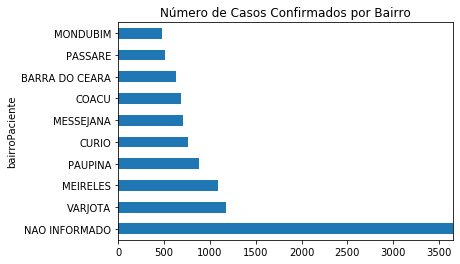

In [37]:
cases_covid_fortaleza_cleaned_positive.groupby('bairroPaciente').count()['codigoPaciente'].sort_values(ascending=False).head(10).plot(kind='barh', title='Número de Casos Confirmados por Bairro', xlim=(0,3650), legend=False)

In [38]:
cases_covid_fortaleza_cleaned_positive.pivot_table(index='bairroPaciente')

DataError: No numeric types to aggregate

In [39]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lon = df['long'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='usa',
    )
fig.show()

In [40]:
bairros['THE_GEOM']

0      POLYGON ((-38.539819067859945 -3.7955371068432...
1      POLYGON ((-38.479334495231086 -3.7209126986722...
2      POLYGON ((-38.467647506862534 -3.7496832300526...
3      POLYGON ((-38.51716445420212 -3.76997951516616...
4      POLYGON ((-38.56887758295916 -3.70168935573553...
                             ...                        
114    POLYGON ((-38.44349599325527 -3.77470652979368...
115    POLYGON ((-38.58258539066931 -3.75321667692344...
116    POLYGON ((-38.564172987455045 -3.7355830497982...
117    POLYGON ((-38.51262420661683 -3.72401253371674...
118    POLYGON ((-38.56508202963311 -3.72717998720506...
Name: THE_GEOM, Length: 119, dtype: object

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [42]:
geo_bairros = gpd.read_file('https://dados.fortaleza.ce.gov.br/dataset/8d20208f-25d6-4ca3-b0bc-1b9b371bd062/resource/781b13ec-b479-4b97-a742-d3b7144672ee/download/limitebairro.json')

<Figure size 432x288 with 0 Axes>

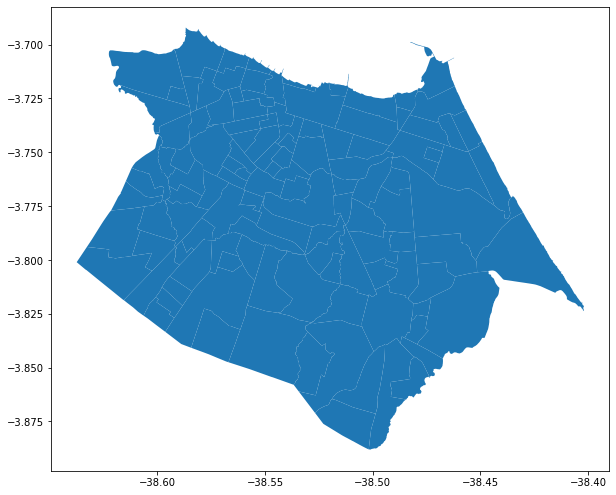

In [43]:
plt.figure()
geo_bairros.plot(figsize=(10,10))

In [92]:
from shapely.geometry import Polygon

In [94]:
map_nao_informado = Polygon([(-38.5348892, -3.6799472),
                             (-38.5348892, -3.6799472),
                             (-38.5359192, -3.6967352),
                             (-38.5084534, -3.697763),
                             (-38.5060501, -3.6830307),
                             (-38.5348892, -3.6799472)])
      

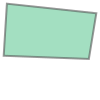

In [95]:
map_nao_informado

In [96]:
df_bairros_nao_informados = pd.DataFrame({'id': ['Limite Bairro.nao-informado'],
     'GID': [9999],
     'NOME': ['NAO INFORMADO'],
     'geometry': map_nao_informado})

In [97]:
df_bairros_nao_informados

id   GID           NOME  \
0  Limite Bairro.nao-informado  9999  NAO INFORMADO   

                                            geometry  
0  POLYGON ((-38.5348892 -3.6799472, -38.5348892 ...

In [98]:
gdf_bairros_nao_informados = gpd.GeoDataFrame(df_bairros_nao_informados)

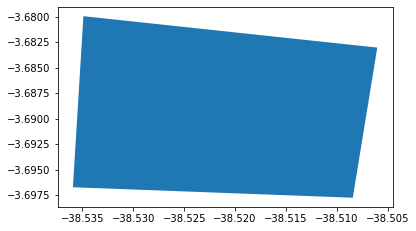

In [99]:
gdf_bairros_nao_informados.plot()

In [93]:
geo_bairros

id  GID                NOME  \
0    Limite Bairro.fid-2be50750_153af4824fe_2d2e    6             PASSARE   
1    Limite Bairro.fid-2be50750_153af4824fe_2d2f   21       CAIS DO PORTO   
2    Limite Bairro.fid-2be50750_153af4824fe_2d30   22         CIDADE 2000   
3    Limite Bairro.fid-2be50750_153af4824fe_2d31   23     ALTO DA BALANCA   
4    Limite Bairro.fid-2be50750_153af4824fe_2d32   17      BARRA DO CEARA   
..                                           ...  ...                 ...   
114  Limite Bairro.fid-2be50750_153af4824fe_2da0  109  MANUEL DIAS BRANCO   
115  Limite Bairro.fid-2be50750_153af4824fe_2da1  110         DOM LUSTOSA   
116  Limite Bairro.fid-2be50750_153af4824fe_2da2  111        PARQUELANDIA   
117  Limite Bairro.fid-2be50750_153af4824fe_2da3  113    PRAIA DE IRACEMA   
118  Limite Bairro.fid-2be50750_153af4824fe_2da4  117         SAO GERARDO   

                                              geometry  
0    POLYGON ((-38.53982 -3.79554, -38.53974 -3.795...  
1    POLYGON ((-38.47933 -3.72091, -38.47930 -3.720...  
2    POLYGON ((-38.46765 -3.74968, -38.46751 -3.749...  
3    POLYGON ((-38.51716 -3.76998, -38.51726 -3.769...  
4    POLYGON ((-38.56888 -3.70169, -38.56893 -3.701...  
..                                                 ...  
114  POLYGON ((-38.44350 -3.77471, -38.44514 -3.773...  
115  POLYGON ((-38.58259 -3.75322, -38.58255 -3.753...  
116  POLYGON ((-38.56417 -3.73558, -38.56331 -3.735...  
117  POLYGON ((-38.51262 -3.72401, -38.51311 -3.723...  
118  POLYGON ((-38.56508 -3.72718, -38.56380 -3.726...  

[119 rows x 4 columns]

In [100]:
todos_bairros = pd.concat([geo_bairros, gdf_bairros_nao_informados])

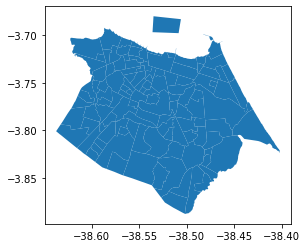

In [102]:
todos_bairros.plot()

In [74]:
cases_covid_fortaleza_cleaned_positive[cases_covid_fortaleza_cleaned_positive['bairroPaciente'] == 'NAO INFORMADO']

codigoPaciente estadoPaciente  \
157     777b475d0810368e4bb564ba595d3489             CE   
217     a51a7150a9edf0a14e70acc138252d6e             CE   
258     5649df934e165893665c2dead82e09b2             CE   
298     f37af4028650938abbed4331bacbe4d3             CE   
308     a90bc9458173289ce2ff64a5213ee02c             CE   
...                                  ...            ...   
234547  04f837bb031911cd00c642468ada4455             CE   
234730  4a688ba1458135e0e7685d3a14b3a629             CE   
235061  9130332ba7b8da3dc2d7a77d177a6285             CE   
235314  3783936a2c9606f3a5909032cf6b127b             CE   
235546  fb1698c1e342ce4be73d14c533e81195             CE   

       codigoMunicipioPaciente municipioPaciente bairroPaciente sexoPaciente  \
157                     230440         FORTALEZA  NAO INFORMADO     FEMININO   
217                     230440         FORTALEZA  NAO INFORMADO    MASCULINO   
258                     230440         FORTALEZA  NAO INFORMADO     FEMININO   
298                     230440         FORTALEZA  NAO INFORMADO     FEMININO   
308                     230440         FORTALEZA  NAO INFORMADO    MASCULINO   
...                        ...               ...            ...          ...   
234547                  230440         FORTALEZA  NAO INFORMADO     FEMININO   
234730                  230440         FORTALEZA  NAO INFORMADO    MASCULINO   
235061                  230440         FORTALEZA  NAO INFORMADO     FEMININO   
235314                  230440         FORTALEZA  NAO INFORMADO    MASCULINO   
235546                  230440         FORTALEZA  NAO INFORMADO     FEMININO   

       idadePaciente               dataNotificacao  \
157               46  2020-05-04T03:00:00.000+0000   
217               47  2020-04-30T03:00:00.000+0000   
258               47  2020-03-22T03:00:00.000+0000   
298               43  2020-03-22T03:00:00.000+0000   
308               41  2020-03-22T03:00:00.000+0000   
...              ...                           ...   
234547            30  2020-05-18T03:00:00.000+0000   
234730            21  2020-05-06T03:00:00.000+0000   
235061            39  2020-06-08T03:00:00.000+0000   
235314            39  2020-06-05T03:00:00.000+0000   
235546            49  2020-06-11T03:00:00.000+0000   

                  dataInicioSintomas               dataColetaExame  \
157     2020-04-24T03:00:00.000+0000  2020-05-04T03:00:00.000+0000   
217     2020-04-15T03:00:00.000+0000  2020-04-24T03:00:00.000+0000   
258     2020-03-19T03:00:00.000+0000  2020-03-21T03:00:00.000+0000   
298     2020-03-18T03:00:00.000+0000  2020-03-22T03:00:00.000+0000   
308     2020-03-18T03:00:00.000+0000  2020-03-20T03:00:00.000+0000   
...                              ...                           ...   
234547  2020-05-11T03:00:00.000+0000  2020-05-19T03:00:00.000+0000   
234730  2020-04-20T03:00:00.000+0000  2020-04-30T03:00:00.000+0000   
235061  2020-05-22T03:00:00.000+0000  2020-06-04T03:00:00.000+0000   
235314  2020-03-15T03:00:00.000+0000  2020-06-03T03:00:00.000+0000   
235546  2020-06-05T03:00:00.000+0000  2020-06-11T03:00:00.000+0000   

                  dataResultadoExame resultadoFinalExame paisPaciente  \
157     2020-05-04T03:00:00.000+0000            Positivo          NaN   
217     2020-04-24T03:00:00.000+0000            Positivo          NaN   
258     2020-04-07T11:18:06.000+0000            Positivo          NaN   
298     2020-04-08T19:45:18.000+0000            Positivo          NaN   
308     2020-03-21T21:53:12.000+0000            Positivo          NaN   
...                              ...                 ...          ...   
234547  2020-05-19T03:00:00.000+0000            Positivo          NaN   
234730  2020-04-30T03:00:00.000+0000            Positivo          NaN   
235061  2020-06-04T03:00:00.000+0000            Positivo          NaN   
235314  2020-06-03T03:00:00.000+0000            Positivo          NaN   
235546  2020-06-11T03:00:00.000+0000            Positivo       

In [44]:
casos_positivos = cases_covid_fortaleza_cleaned_positive.groupby('bairroPaciente').count()['codigoPaciente']

In [45]:
casos_positivos

bairroPaciente
AEROLANDIA           7
AEROPORTO           31
ALDEOTA              5
ALTO DA BALANCA     91
ALVARO WEYNE       268
                  ... 
VICENTE PINZON     314
VILA ELLERY         47
VILA PERY            2
VILA UNIAO         224
VILA VELHA         361
Name: codigoPaciente, Length: 118, dtype: int64

In [46]:
geo_bairros_casos_positivos = pd.merge(left=geo_bairros, right=casos_positivos, left_on='NOME', right_on='bairroPaciente')
geo_bairros_casos_positivos.rename(columns={'codigoPaciente': 'CASOS_POSITIVOS'}, inplace=True)
geo_bairros_casos_positivos

id  GID                NOME  \
0    Limite Bairro.fid-2be50750_153af4824fe_2d2e    6             PASSARE   
1    Limite Bairro.fid-2be50750_153af4824fe_2d2f   21       CAIS DO PORTO   
2    Limite Bairro.fid-2be50750_153af4824fe_2d30   22         CIDADE 2000   
3    Limite Bairro.fid-2be50750_153af4824fe_2d31   23     ALTO DA BALANCA   
4    Limite Bairro.fid-2be50750_153af4824fe_2d32   17      BARRA DO CEARA   
..                                           ...  ...                 ...   
112  Limite Bairro.fid-2be50750_153af4824fe_2da0  109  MANUEL DIAS BRANCO   
113  Limite Bairro.fid-2be50750_153af4824fe_2da1  110         DOM LUSTOSA   
114  Limite Bairro.fid-2be50750_153af4824fe_2da2  111        PARQUELANDIA   
115  Limite Bairro.fid-2be50750_153af4824fe_2da3  113    PRAIA DE IRACEMA   
116  Limite Bairro.fid-2be50750_153af4824fe_2da4  117         SAO GERARDO   

                                              geometry  CASOS_POSITIVOS  
0    POLYGON ((-38.53982 -3.79554, -38.53974 -3.795...              509  
1    POLYGON ((-38.47933 -3.72091, -38.47930 -3.720...               69  
2    POLYGON ((-38.46765 -3.74968, -38.46751 -3.749...               83  
3    POLYGON ((-38.51716 -3.76998, -38.51726 -3.769...               91  
4    POLYGON ((-38.56888 -3.70169, -38.56893 -3.701...              629  
..                                                 ...              ...  
112  POLYGON ((-38.44350 -3.77471, -38.44514 -3.773...               34  
113  POLYGON ((-38.58259 -3.75322, -38.58255 -3.753...               48  
114  POLYGON ((-38.56417 -3.73558, -38.56331 -3.735...                3  
115  POLYGON ((-38.51262 -3.72401, -38.51311 -3.723...               65  
116  POLYGON ((-38.56508 -3.72718, -38.56380 -3.726...              137  

[117 rows x 5 columns]

In [135]:
geo_todos_bairros_casos_positivos = pd.merge(left=todos_bairros, right=casos_positivos, left_on='NOME', right_on='bairroPaciente', how='left')
geo_todos_bairros_casos_positivos.rename(columns={'codigoPaciente': 'CASOS_POSITIVOS'}, inplace=True)
geo_todos_bairros_casos_positivos['CASOS_POSITIVOS'].fillna(0, inplace=True)
geo_todos_bairros_casos_positivos

id   GID              NOME  \
0    Limite Bairro.fid-2be50750_153af4824fe_2d2e     6           PASSARE   
1    Limite Bairro.fid-2be50750_153af4824fe_2d2f    21     CAIS DO PORTO   
2    Limite Bairro.fid-2be50750_153af4824fe_2d30    22       CIDADE 2000   
3    Limite Bairro.fid-2be50750_153af4824fe_2d31    23   ALTO DA BALANCA   
4    Limite Bairro.fid-2be50750_153af4824fe_2d32    17    BARRA DO CEARA   
..                                           ...   ...               ...   
115  Limite Bairro.fid-2be50750_153af4824fe_2da1   110       DOM LUSTOSA   
116  Limite Bairro.fid-2be50750_153af4824fe_2da2   111      PARQUELANDIA   
117  Limite Bairro.fid-2be50750_153af4824fe_2da3   113  PRAIA DE IRACEMA   
118  Limite Bairro.fid-2be50750_153af4824fe_2da4   117       SAO GERARDO   
119                  Limite Bairro.nao-informado  9999     NAO INFORMADO   

                                              geometry  CASOS_POSITIVOS  
0    POLYGON ((-38.53982 -3.79554, -38.53974 -3.795...            509.0  
1    POLYGON ((-38.47933 -3.72091, -38.47930 -3.720...             69.0  
2    POLYGON ((-38.46765 -3.74968, -38.46751 -3.749...             83.0  
3    POLYGON ((-38.51716 -3.76998, -38.51726 -3.769...             91.0  
4    POLYGON ((-38.56888 -3.70169, -38.56893 -3.701...            629.0  
..                                                 ...              ...  
115  POLYGON ((-38.58259 -3.75322, -38.58255 -3.753...             48.0  
116  POLYGON ((-38.56417 -3.73558, -38.56331 -3.735...              3.0  
117  POLYGON ((-38.51262 -3.72401, -38.51311 -3.723...             65.0  
118  POLYGON ((-38.56508 -3.72718, -38.56380 -3.726...            137.0  
119  POLYGON ((-38.53489 -3.67995, -38.53489 -3.679...           3651.0  

[120 rows x 5 columns]

In [136]:
geo_todos_bairros_casos_positivos[geo_todos_bairros_casos_positivos['CASOS_POSITIVOS'].isna()]

Empty GeoDataFrame
Columns: [id, GID, NOME, geometry, CASOS_POSITIVOS]
Index: []

In [137]:
geo_todos_bairros_casos_positivos[geo_todos_bairros_casos_positivos['NOME'] == 'NAO INFORMADO']

id   GID           NOME  \
119  Limite Bairro.nao-informado  9999  NAO INFORMADO   

                                              geometry  CASOS_POSITIVOS  
119  POLYGON ((-38.53489 -3.67995, -38.53489 -3.679...           3651.0

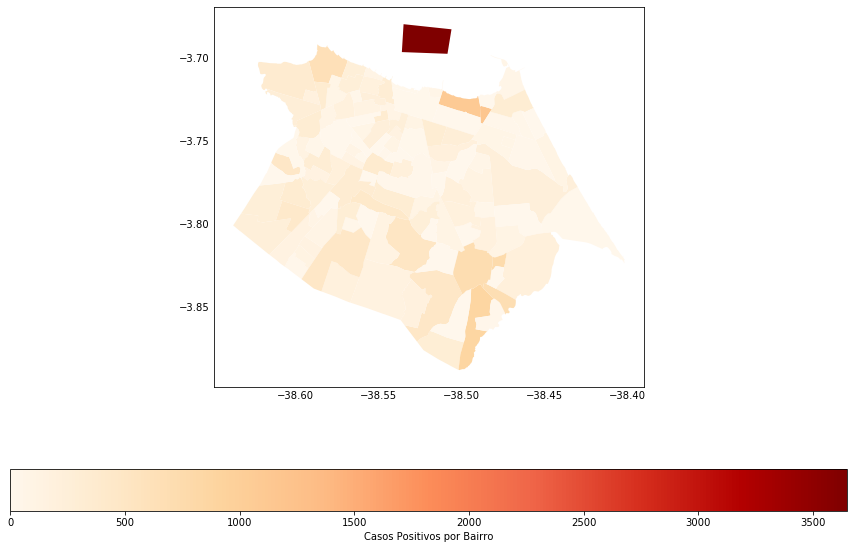

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.tick_params(axis='both', which='both',length=0)
geo_todos_bairros_casos_positivos.plot(column='CASOS_POSITIVOS', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Casos Positivos por Bairro", 'orientation': "horizontal"})

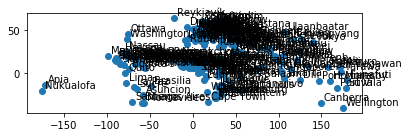

In [139]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

ax = cities.plot()

for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

In [140]:
geo_bairros_casos_positivos_crs = geo_bairros_casos_positivos.to_crs(epsg=4326)

In [141]:
geo_todos_bairros_casos_positivos_crs_4326 = geo_todos_bairros_casos_positivos.to_crs(epsg=4326)

In [142]:
import contextily as ctx

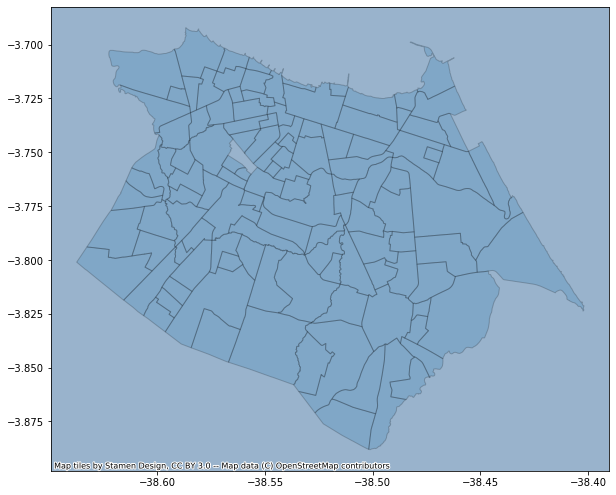

In [143]:
ax = geo_bairros_casos_positivos_crs.plot(figsize=(10, 10), alpha=0.2, edgecolor='k')
ctx.add_basemap(ax, zoom=13)

In [144]:
import folium

In [145]:
casos_positivos

bairroPaciente
AEROLANDIA           7
AEROPORTO           31
ALDEOTA              5
ALTO DA BALANCA     91
ALVARO WEYNE       268
                  ... 
VICENTE PINZON     314
VILA ELLERY         47
VILA PERY            2
VILA UNIAO         224
VILA VELHA         361
Name: codigoPaciente, Length: 118, dtype: int64

In [146]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = 'https://dados.fortaleza.ce.gov.br/dataset/8d20208f-25d6-4ca3-b0bc-1b9b371bd062/resource/781b13ec-b479-4b97-a742-d3b7144672ee/download/limitebairro.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[-3.7899266, -38.5889868], zoom_start=12)

choropleth = folium.Choropleth(
            geo_data=state_geo,
            name='choropleth',
            data=casos_positivos,
            columns=['codigoPaciente'],
            key_on='feature.properties.NOME',
            fill_color='YlOrRd',
            fill_opacity=0.7,
            line_opacity=0.2,
            highlight=True,
            legend_name='Casos confirmados de Covid-19'
).add_to(m)
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['NOME'], style=style_function, labels=False))
# choropleth.geojson.add_child(folium.Tooltip('My name is Circle'))

folium.LayerControl().add_to(m)

m

In [147]:
geo_bairros_casos_positivos_json = geo_bairros_casos_positivos_crs.to_json()

In [148]:
geo_todos_bairros_casos_positivos_crs_4326_json = geo_todos_bairros_casos_positivos_crs_4326.to_json()

In [149]:
import json

In [150]:
geo_bairros_casos_positivos_json_teste = json.loads(geo_bairros_casos_positivos_json)

In [151]:
quantidade_casos_positivos_bairros_nao_informados = casos_positivos['NAO INFORMADO']
quantidade_casos_positivos_bairros_nao_informados

3651

In [152]:
casos_positivos_bairros_informados = casos_positivos.drop(labels='NAO INFORMADO')

In [153]:
casos_positivos_bairros_informados

bairroPaciente
AEROLANDIA           7
AEROPORTO           31
ALDEOTA              5
ALTO DA BALANCA     91
ALVARO WEYNE       268
                  ... 
VICENTE PINZON     314
VILA ELLERY         47
VILA PERY            2
VILA UNIAO         224
VILA VELHA         361
Name: codigoPaciente, Length: 117, dtype: int64

In [154]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = 'https://dados.fortaleza.ce.gov.br/dataset/8d20208f-25d6-4ca3-b0bc-1b9b371bd062/resource/781b13ec-b479-4b97-a742-d3b7144672ee/download/limitebairro.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[-3.7899266, -38.5889868], zoom_start=12)

choropleth = folium.Choropleth(
            geo_data=geo_todos_bairros_casos_positivos_crs_4326_json,
            name='choropleth',
            data=casos_positivos,
            columns=['codigoPaciente'],
            key_on='feature.properties.NOME',
            fill_color='YlOrRd',
            fill_opacity=0.7,
            line_opacity=0.2,
            highlight=True,
            legend_name='Casos confirmados de Covid-19'
).add_to(m)
style = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['CASOS_POSITIVOS'], style=style, labels=False))
# choropleth.geojson.add_child(folium.Tooltip('My name is Circle'))

folium.LayerControl().add_to(m)

m